In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder() # xử lý dữ liệu chữ

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [4]:
data.shape == data.dropna().shape 

True

Atrrition nghĩa là nhân viên còn làm việc hay không , 

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data_age = data['Age'].value_counts()

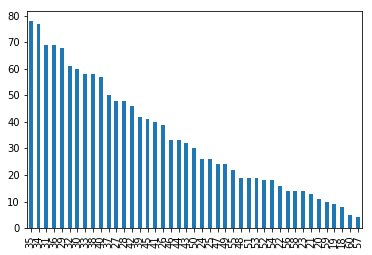

In [7]:
data_age.plot.bar()

In [8]:
attrition_yes = data[data['Attrition']=='Yes'] # danh sách còn làm việc

In [9]:
data[data['Attrition']=='Yes'].shape[0]

237

In [10]:
data[data['Attrition']=='No'].shape[0]

1233

In [11]:
y_bar = np.array([data[data['Attrition']=='Yes'].shape[0],
                     data[data['Attrition']=='No'].shape[0]])

In [12]:
x_bar = ['Yes', 'No']

<BarContainer object of 2 artists>

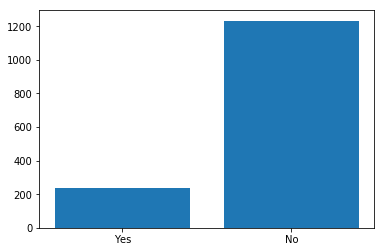

In [13]:
plt.bar(x_bar,y_bar) # tỉ lệ nghỉ việc gần 80%

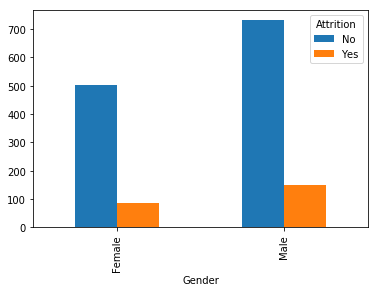

In [22]:
pd.crosstab(data.Gender, data.Attrition).plot(kind="bar") # tỉ lệ nghĩ việc của nam và nữ

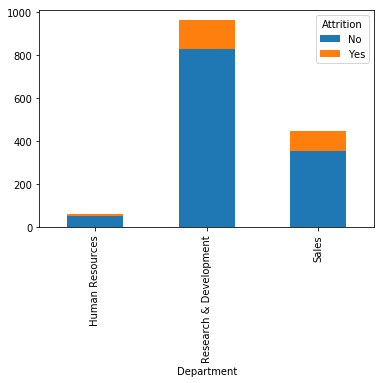

In [23]:
pd.crosstab(data.Department, data.Attrition).plot(kind="bar", stacked=True) # tỉ lệ nghĩ việc với từng ngành

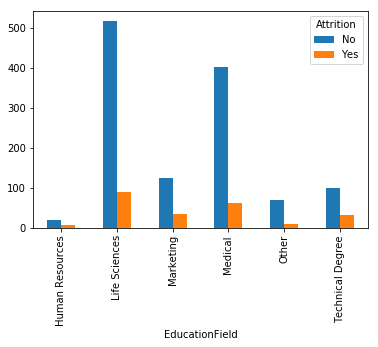

In [24]:
pd.crosstab(data.EducationField, data.Attrition).plot(kind="bar", stacked=False) # tỉ lệ nghỉ việc tương ứng với education

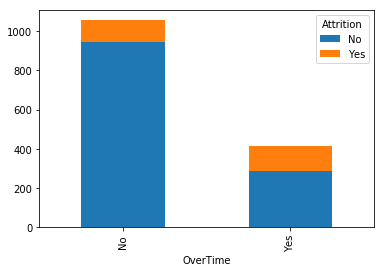

In [25]:
pd.crosstab(data.OverTime, data.Attrition).plot(kind="bar", stacked=True) # tỉ lệ nghỉ việc tương ứng với overtime

In [26]:
len(data[data["OverTime"]  == "No"])

1054

In [117]:
data_tar = data.drop(['Attrition'], axis=1) # drop attrition khỏi mô hình train

In [28]:
y = data['Attrition']

In [29]:
from sklearn.model_selection import train_test_split # tách dữ liệu để train

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_tar, y, train_size=0.8, random_state=0)

In [103]:
def encoding(data): #chuyển đổi dữ liệu chữ thành số
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == "object":
            categorical.append(col)  # lấy những phần tử là categorical
    
    numerical = data.columns.difference(categorical) # những column là số
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat) # dummies data categorical
    attrition_num = data[numerical] # data số
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1) # gộp 2 bảng này lại
    return attrition_final

In [104]:
x_train_encoding = encoding(x_train)

In [105]:
x_test_encode = encoding(x_test)

In [34]:
def target_encode(data):
    target_map = {"Yes":1, "No":0}
    
    target = data.apply(lambda x:target_map[x])
    return target

In [35]:
y_train_encode = target_encode(y_train)

In [36]:
y_test_encode = target_encode(y_test)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting machine là một phương pháp rất hiệu quả trong bài toán supervised learning với dữ liệu dạng bảng 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss, classification_report

In [38]:
seed = 0 
oversampler=SMOTE(random_state=0)

smote_train,smote_target=oversampler.fit_sample(x_train_encode,y_train_encode)
gb_params ={
'n_estimators': 1500,
'max_features': 0.9,
'learning_rate' : 0.25,
'max_depth': 4,
'min_samples_leaf': 2,
'subsample': 1,
'max_features' : 'sqrt',
'random_state' : seed,
'verbose': 0
}
#setup các param 

In [39]:
gb = GradientBoostingClassifier(**gb_params) #setting thuật toán với các params 

In [40]:
gb.fit(smote_train, smote_target) # tiến hành train model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
gb_predictions = gb.predict(x_test_encode) # dự đoán dữ liệu test bằng model trên

In [57]:
gb_predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [58]:
print(accuracy_score(y_test_encode, gb_predictions)) # so sánh độ chính xác của dự đoán với y_test

0.8639455782312925


In [44]:
print(classification_report(y_test_encode, gb_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       245
           1       0.66      0.39      0.49        49

    accuracy                           0.86       294
   macro avg       0.77      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294



In [116]:
features = x_train_encode.columns.values
features[52]

'Over18_Y'

In [106]:
importances = gb.feature_importances_ # các biến quan trọng trong mô hình

array([1.40259385e-02, 1.70952424e-02, 1.08638969e-02, 1.40370282e-02,
       0.00000000e+00, 1.14408703e-02, 3.30734128e-02, 8.42271263e-03,
       2.93918724e-02, 2.61587584e-02, 4.67705096e-02, 3.42300301e-02,
       1.66562240e-02, 6.73397178e-03, 4.60441152e-03, 3.42125931e-03,
       2.78774760e-02, 0.00000000e+00, 3.77197587e-02, 1.56591041e-02,
       7.65180824e-03, 2.12435738e-02, 5.60651863e-02, 2.41873644e-02,
       4.72864122e-03, 9.15873836e-03, 2.02226777e-02, 2.85540501e-03,
       4.02784208e-02, 5.34554689e-03, 1.69451778e-02, 7.94077488e-03,
       1.98320749e-05, 2.96955300e-02, 3.33945716e-03, 5.55306157e-02,
       4.17852143e-03, 6.78953714e-03, 1.86759268e-02, 5.26740960e-03,
       2.31661468e-03, 4.71992878e-04, 1.26275266e-03, 2.53507361e-03,
       5.64477245e-03, 1.28515815e-03, 8.35548796e-03, 5.80245528e-03,
       4.40772532e-04, 1.72147246e-02, 3.10913112e-02, 7.99513185e-03,
       0.00000000e+00, 1.80076289e-01, 3.72048404e-02])

In [115]:
indices = np.argsort(importances) # sắp xếp và trả về index theo thứ tự

array([52,  4, 17, 32, 48, 41, 42, 45, 40, 43, 27, 34, 15, 36, 14, 24, 39,
       29, 44, 47, 13, 37, 20, 31, 51, 46,  7, 25,  2,  5,  0,  3, 19, 12,
       30,  1, 49, 38, 26, 21, 23,  9, 16,  8, 33, 50,  6, 11, 54, 18, 28,
       10, 35, 22, 53], dtype=int64)

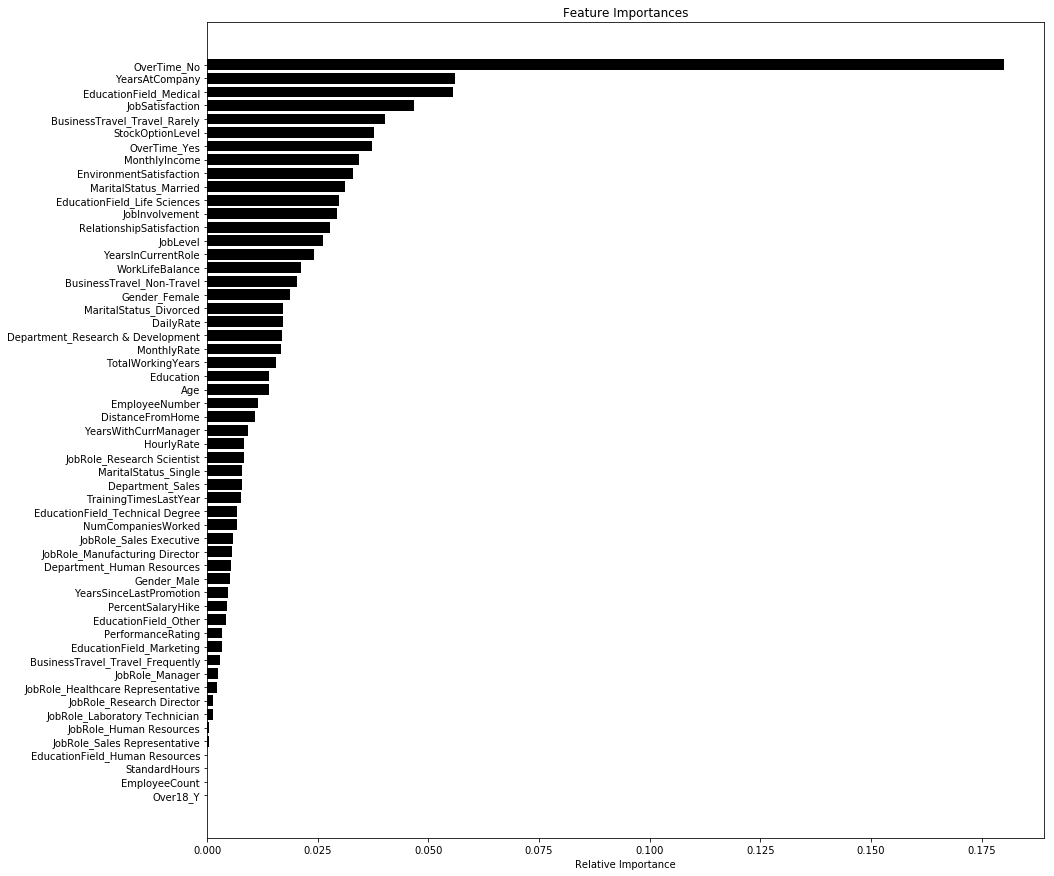

In [119]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()